In [2]:
!git clone https://github.com/oreilly-japan/deep-learning-from-scratch

Cloning into 'deep-learning-from-scratch'...
remote: Enumerating objects: 573, done.
remote: Counting objects: 100% (14/14), done.
remote: Compressing objects: 100% (13/13), done.
remote: Total 573 (delta 3), reused 2 (delta 1), pack-reused 559 (from 3)
Receiving objects: 100% (573/573), 10.61 MiB | 6.11 MiB/s, done.
Resolving deltas: 100% (290/290), done.


In [3]:
import sys, os
sys.path.append(
    os.path.join(os.getcwd(), 'deep-learning-from-scratch')
)
import numpy as np
from dataset.mnist import load_mnist # Changed 'data_minst' to 'load_mnist'
from PIL import Image

In [4]:
(x_train, t_train), (x_test, t_test) = load_mnist(flatten=True, normalize=False)


Done
Done
Done
Done
Converting train-images-idx3-ubyte.gz to NumPy Array ...
Done
Converting train-labels-idx1-ubyte.gz to NumPy Array ...
Done
Converting t10k-images-idx3-ubyte.gz to NumPy Array ...
Done
Converting t10k-labels-idx1-ubyte.gz to NumPy Array ...
Done
Creating pickle file ...
Done!


In [5]:
print(x_train.shape)
print(t_train.shape)
print(x_test.shape)
print(t_test.shape)


(60000, 784)
(60000,)
(10000, 784)
(10000,)


In [6]:
from ch03.mnist_show import img_show

5
(784,)
(28, 28)


In [7]:
!cp ./deep-learning-from-scratch/ch03/sample_weight.pkl ./

In [8]:
import pickle
import numpy as np
from common.functions import sigmoid, softmax
#from ch03.neuralnet_mnist import get_data, init_network, predict
def get_data():
  (x_train, t_train), (x_test, t_test) = load_mnist(
      normalize=True, flatten=True, one_hot_label=False
  )
  return x_test, t_test

def init_network():
  with open("sample_weight.pkl", 'rb') as f:
      network = pickle.load(f)
  return network

def predict(network,x):
  W1, W2, W3 = network['W1'], network['W2'], network['W3']
  b1, b2, b3 = network['b1'], network['b2'], network['b3']

  a1 = np.dot(x,W1) + b1
  z1 = sigmoid(a1)
  a2 = np.dot(z1,W2) + b2
  z2 = sigmoid(a2)
  a3 = np.dot(z2,W3) + b3
  y = softmax(a3)

  return y

In [9]:
x, t = get_data()
network = init_network()

accuracy_cnt = 0

for i in range(len(x)):
  y = predict(network, x[i])
  p = np.argmax(y) #확률이 가장 높은것을 찾아내는것.
  if p == t[i]:
    accuracy_cnt += 1

print("Accuracy:" + str(float(accuracy_cnt) / len(x)))

Accuracy:0.9352


In [10]:
x, _ = get_data()
network = init_network()
W1, W2, W3 = network['W1'], network['W2'], network['W3']

print(x.shape)
print(x[0].shape)
print(W1.shape)
print(W2.shape)

(10000, 784)
(784,)
(784, 50)
(50, 100)


배치 처리

In [11]:
x, t = get_data()
network = init_network()

batch_size = 10 # 배치 크기
accuracy_cnt = 0

for i in range(0, len(x), batch_size):
  x_batch = x[i:i+batch_size]
  y_batch = predict(network, x_batch)
  p = np.argmax(y_batch, axis=1)
  accuracy_cnt += np.sum(p == t[i:i+batch_size])

print("Accuracy:" + str(float(accuracy_cnt) / len(x)))

Accuracy:0.9352


학습

In [12]:
import sys, os
sys.path.append(
    os.path.join(os.getcwd(), 'deep-learning-from-scratch')
)
import numpy as np
from dataset.mnist import load_mnist

(x_train, t_train), (x_test, t_test) = load_mnist(normalize=True, one_hot_label=True)

print(x_train.shape)
print(t_train.shape)

print(t_train[0])


(60000, 784)
(60000, 10)
[0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]


In [13]:
train_size = x_train.shape[0]
batch_size = 10
batch_mask = np.random.choice(train_size, batch_size)
x_batch = x_train[batch_mask]
t_batch = t_train[batch_mask]

In [14]:
print(np.random.choice(60000, 10))

[38172 20432 11372 45663  9926 34497  8138 26745 34172 36971]


In [15]:
def cross_entropy_error(y, t):
  delta = 1e-7
  return -np.sum(t * np.log(y + delta))

In [16]:
def cross_entropy_error(y,t):
  if y.ndim == 1:
    t = t.reshape(1, t.size)
    y = y.reshape(1, y.size)
  batch_size = y.shape[0]
  return -np.sum(t * np.log(y + 1e-7)) / batch_size

In [17]:
y = np.array([[0.0, 0.7, 0.1, 0.0, 0.05, 0.05, 0.1, 0.0, 0.0, 0.0]])
t = np.array([1])

print(
  cross_entropy_error(
    y,t
  )
)


91.54378178897429


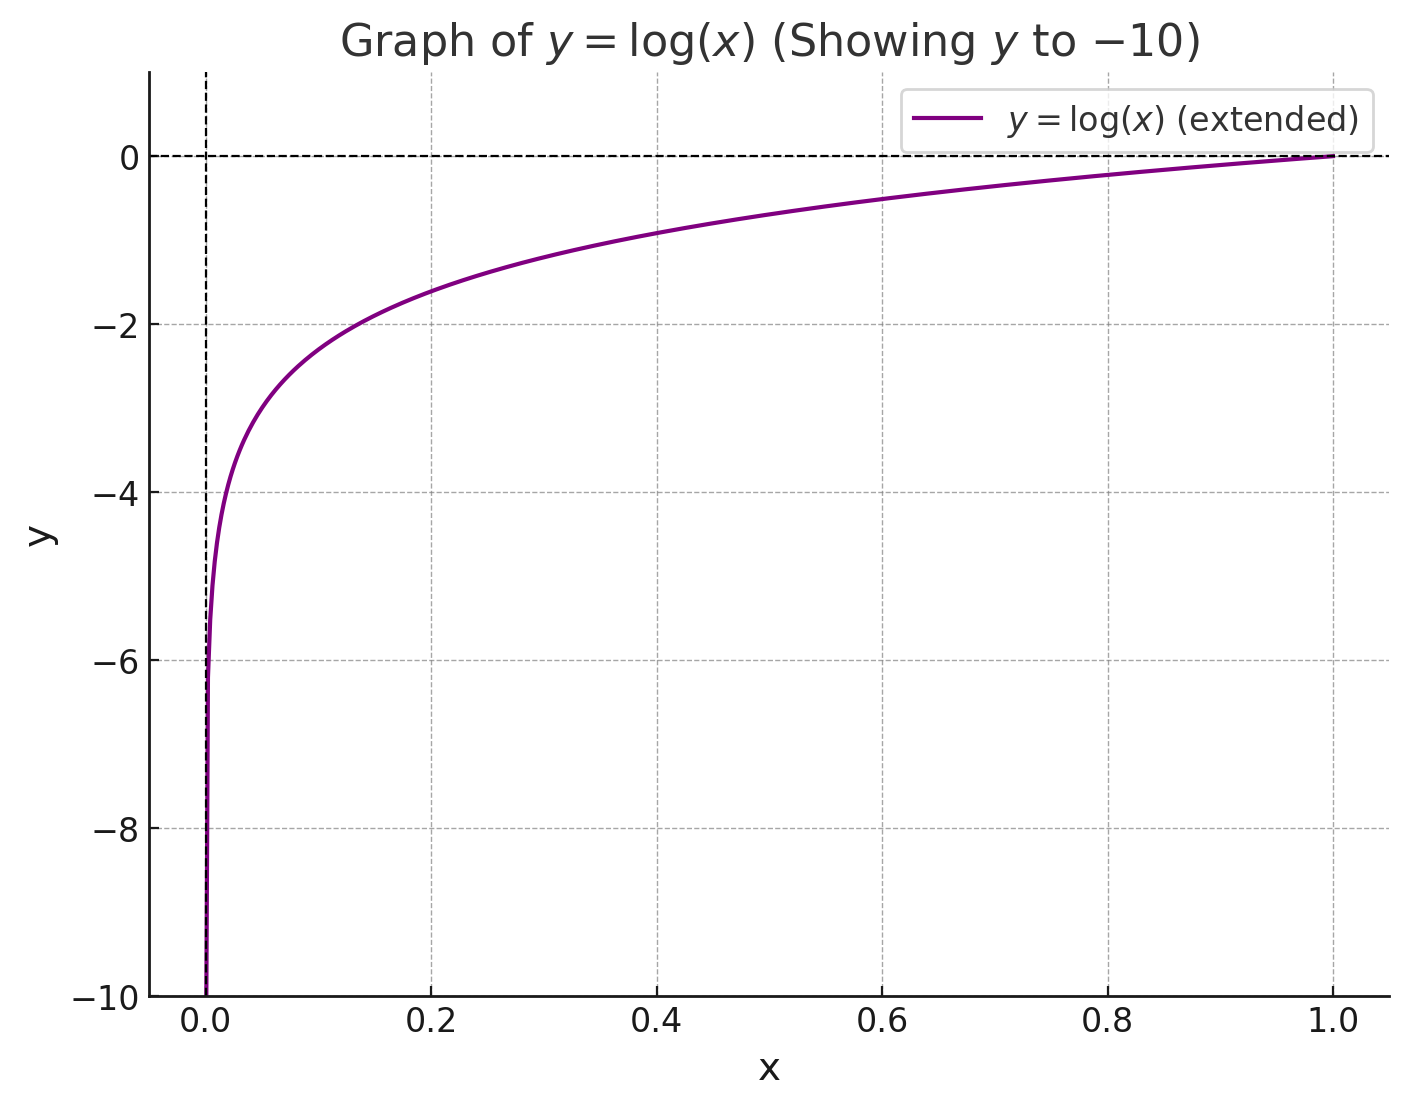

In [18]:
#오차를 계산하는 방법
def cross_entropy_error(y,t):
  if y.ndim == 1:
    t = t.reshape(1, t.size)
    y = y.reshape(1, y.size)
  #데이터의 길이 만큼.
  batch_size = y.shape[0]
  # 모든 오차를 합산하고 양수로 변환
  return -np.sum(

      np.log(
          y[
              np.arange(batch_size), t
          ]
          +
          1e-7
        )
      )
      /
      batch_size

In [19]:
y = np.array([[0.0, 0.7, 0.1, 0.0, 0.05, 0.05, 0.1, 0.0, 0.0, 0.0]])
t = np.array([1])

print(
  cross_entropy_error(
    y,t
  )
)


0.3566748010815999


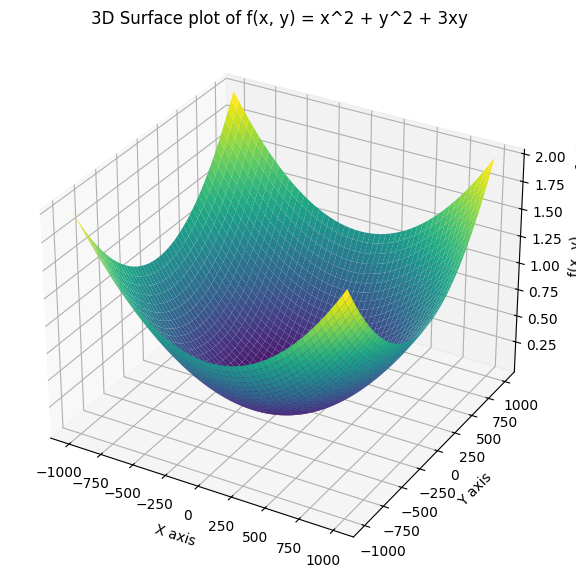

In [20]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# 함수 정의 (x, y에 대한 함수)
def f(x, y):
    return x**2 + y**2
# x, y 값 생성
x = np.linspace(-1000, 1000, 400)
y = np.linspace(-1000, 1000, 400)

# 그리드 포인트 생성
X, Y = np.meshgrid(x, y)

# 함수 값 계산
Z = f(X, Y)

# 3D 그래프 그리기
fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(X, Y, Z, cmap='viridis')

# 축 레이블 설정
ax.set_xlabel('X axis')
ax.set_ylabel('Y axis')
ax.set_zlabel('f(x, y)')

# 그래프 타이틀 설정
ax.set_title('3D Surface plot of f(x, y) = x^2 + y^2 + 3xy')

# 그래프 표시
plt.show()


In [21]:
def numeriacal_gradient(f,x):
  h = 1e-4
  grad = np.zeros_like(x)

  for idx in range(x.size):
    tmp_val = x[idx]
    x[idx] = tmp_val + h
    fxh1 = f(x)

    x[idx] = tmp_val - h
    fxh2 = f(x)

    grad[idx] = (fxh1 - fxh2) / (2*h)
    x[idx] = tmp_val

  return grad

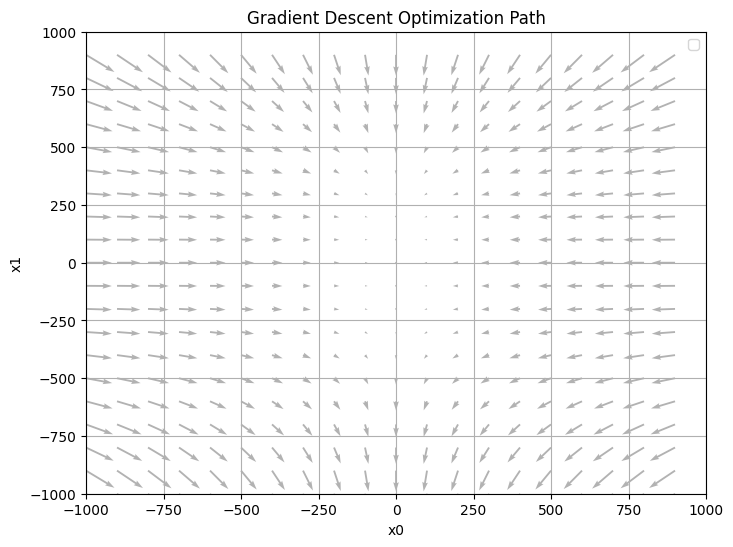

In [22]:
import numpy as np
import matplotlib.pylab as plt
from mpl_toolkits.mplot3d import Axes3D


# 수치적 기울기 계산 함수
def _numerical_gradient_no_batch(f, x):
    h = 1e-4  # 0.0001
    grad = np.zeros_like(x)

    for idx in range(x.size):
        tmp_val = x[idx]
        x[idx] = float(tmp_val) + h
        fxh1 = f(x)  # f(x+h)

        x[idx] = tmp_val - h
        fxh2 = f(x)  # f(x-h)
        grad[idx] = (fxh1 - fxh2) / (2*h)

        x[idx] = tmp_val  # 값 복원

    return grad


def numerical_gradient(f, X):
    #1차원 행렬의 경우 바로 연산
    if X.ndim == 1:
        return _numerical_gradient_no_batch(f, X)
    #n차원 행렬의 경우
    else:
        grad = np.zeros_like(X)
        for idx, x in enumerate(X):
            grad[idx] = _numerical_gradient_no_batch(f, x)

        return grad



# 함수 정의: x0^2 * 800 + x1^3
def function_2(x):
    return x[0]**2 * 1500 + x[1] ** 3



if __name__ == '__main__':
    # x0, x1 범위
    x0 = np.arange(-1000, 1000, 100)
    x1 = np.arange(-1000, 1000, 100)
    X, Y = np.meshgrid(x0, x1)

    # x0, x1을 1D 배열로 변환
    X = X.flatten()
    Y = Y.flatten()

    # 기울기 계산
    grad = numerical_gradient(function_2, np.array([X, Y]).T).T


    # 함수와 기울기 시각화
    plt.figure(figsize=(8, 6))
    plt.quiver(X, Y, -grad[0], -grad[1], angles="xy", color="#666666", alpha=0.5)

    plt.xlim([-1000, 1000])
    plt.ylim([-1000, 1000])
    plt.xlabel('x0')
    plt.ylabel('x1')
    plt.title('Gradient Descent Optimization Path')
    plt.grid()
    plt.legend()
    plt.show()


In [23]:
def  gradient_descent(f,init_x, learing_rate=0.01, step_num=100):
  x = init_x
  for i in range(step_num):
    grad = numeriacal_gradient(f,x)
    x -= learing_rate * grad
  return x

def function_2(x):
  return x[0]**2 + x[1]**2


init_x = np.array([-3.0, 4.0])
print(gradient_descent(function_2,init_x, 0.1,100))


[-6.11110793e-10  8.14814391e-10]


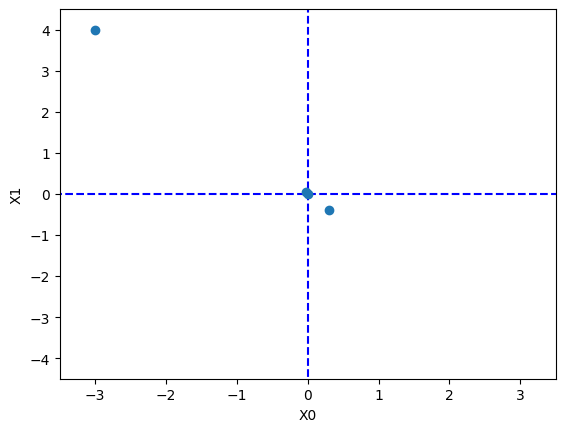

In [46]:
import numpy as np
import matplotlib.pylab as plt
from ch04.gradient_2d import numerical_gradient


def gradient_descent(f, init_x, lr=0.01, step_num=100):
    x = init_x
    x_history = []

    for i in range(step_num):
        x_history.append( x.copy() )

        grad = numerical_gradient(f, x)
        x -= lr * grad

    return x, np.array(x_history)


def function_2(x):
    return x[0]**2 + x[1]**2

init_x = np.array([-3.0, 4.0])

lr = 0.55
step_num = 4
x, x_history = gradient_descent(function_2, init_x, lr=lr, step_num=step_num)

plt.plot( [-5, 5], [0,0], '--b')
plt.plot( [0,0], [-5, 5], '--b')
plt.plot(x_history[:,0], x_history[:,1], 'o')

plt.xlim(-3.5, 3.5)
plt.ylim(-4.5, 4.5)
plt.xlabel("X0")
plt.ylabel("X1")
plt.show()

In [72]:
import sys, os
sys.path.append(
    os.path.join(os.getcwd(), 'deep-learning-from-scratch')
)
from common.functions import softmax, cross_entropy_error
from common.gradient import numerical_gradient

class simpleNet:
  def __init__(self):
    self.W = np.random.randn(2,3)
    #print(self.W)

  def predict(self, x):
    return np.dot(x, self.W)

  def loss(self, x, t):
    z = self.predict(x)
    y = softmax(z)
    loss = cross_entropy_error(y,t)

    return loss

net = simpleNet()
print(net.W)
print('-'*100)
x = np.array([0.6, 0.9])
p = net.predict(x)
print(p)
print('-'*100)
print(np.argmax(p))
print('-'*100)
t = np.array([0, 0, 1])
print(net.loss(x,t))
print('-'*100)

def f(W):
  return net.loss(x,t)

dW = numerical_gradient(f, net.W)
print(dW)
print('='*100)

net.W = net.W - dW
print(net.W)
print('-'*100)
x = np.array([0.6, 0.9])
p = net.predict(x)
print(p)
print('-'*100)
print(np.argmax(p))
print('-'*100)
t = np.array([0, 0, 1])
print(net.loss(x,t))
print('-'*100)
dW = numerical_gradient(f, net.W)




[[-0.62968733  0.05792983  0.02087672]
 [ 1.06209763 -0.25075375  0.18255618]]
----------------------------------------------------------------------------------------------------
[ 0.57807547 -0.19092048  0.17682659]
----------------------------------------------------------------------------------------------------
0
----------------------------------------------------------------------------------------------------
1.1587600012742998
----------------------------------------------------------------------------------------------------
[[ 0.28129893  0.13037592 -0.41167484]
 [ 0.42194839  0.19556388 -0.61751226]]
[[-0.91098626 -0.07244609  0.43255156]
 [ 0.64014924 -0.44631762  0.80006844]]
----------------------------------------------------------------------------------------------------
[ 0.02954257 -0.44515352  0.97959253]
----------------------------------------------------------------------------------------------------
2
----------------------------------------------------------